In [40]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib
from sklearn.pipeline import Pipeline


In [3]:
df= pd.read_csv("Cardiovascular Disease dataset.csv", sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Convert age from days to years and create a new column 
df['age_years'] = (df['age'] / 365).astype(int)

In [7]:
# Drop the original 'age' column to avoid confusion
df.drop(columns=['age'], inplace=True)



In [8]:
df['age_years'].describe()

count    70000.000000
mean        52.840671
std          6.766774
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: age_years, dtype: float64

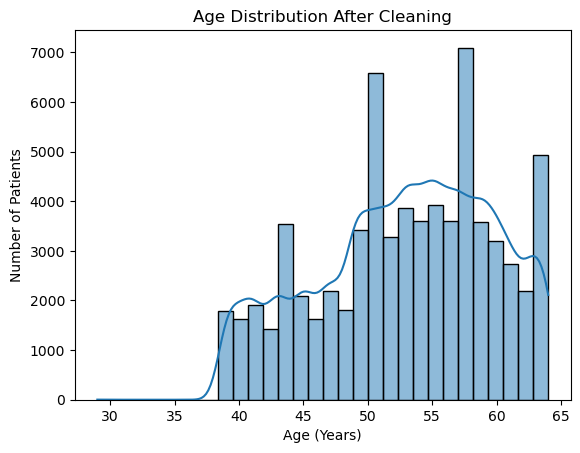

In [9]:
# Plot the distribution of cleaned age data
sns.histplot(df['age_years'], bins=30, kde=True)
plt.title("Age Distribution After Cleaning")
plt.xlabel("Age (Years)")
plt.ylabel("Number of Patients")
plt.show()

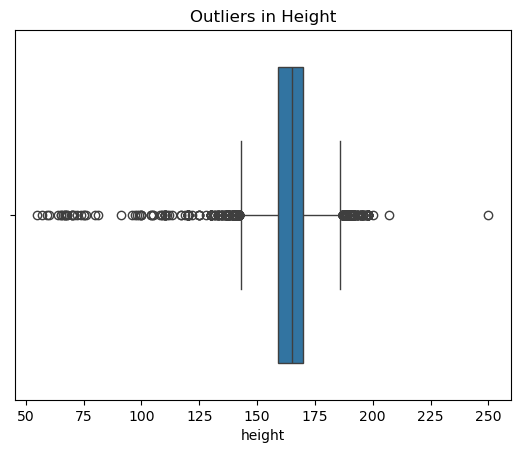

In [10]:
# Visualize outliers in height using a boxplot
sns.boxplot(x=df['height'])
plt.title("Outliers in Height")
plt.show()

In [11]:
# Recalculate a safer median from reasonable height range
median_height = df[(df['height'] >= 130) & (df['height'] <= 200)]['height'].median()

# Replace outliers with the median
df.loc[(df['height'] < 130) | (df['height'] > 200), 'height'] = median_height

In [12]:
print("Min height after cleaning:", df['height'].min())
print("Max height after cleaning:", df['height'].max())

Min height after cleaning: 130
Max height after cleaning: 200


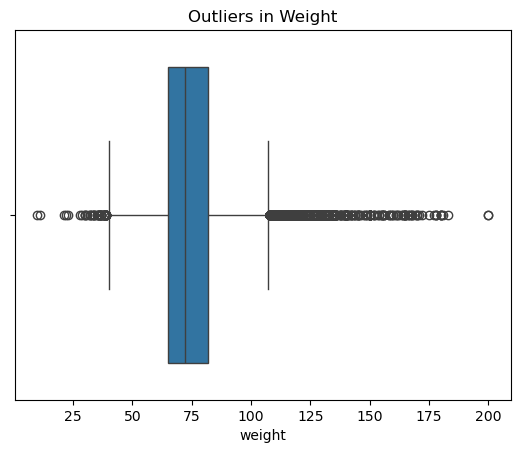

In [13]:
# Visualize outliers in weight using a boxplot
sns.boxplot(x=df['weight'])
plt.title("Outliers in Weight")
plt.show()

In [14]:
# Define the acceptable range for weight based on visual analysis
min_weight = 40    # Minimum reasonable weight (kg)
max_weight = 150   # Maximum reasonable weight (kg)

# Calculate the median weight only from values within the acceptable range
median_weight = df[(df['weight'] >= min_weight) & (df['weight'] <= max_weight)]['weight'].median()

# Replace outliers (less than 40 or more than 150) with the calculated median
df.loc[(df['weight'] < min_weight) | (df['weight'] > max_weight), 'weight'] = median_weight

# Print the min and max weight after cleaning to confirm it's within the expected range
print("Min weight after cleaning:", df['weight'].min())
print("Max weight after cleaning:", df['weight'].max())

Min weight after cleaning: 40.0
Max weight after cleaning: 150.0


In [15]:
# Define the list of categorical columns to check
cat_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Loop through each column and print the unique values
for col in cat_cols:
    unique_vals = df[col].unique()
    print(f"Unique values in '{col}': {unique_vals}")

Unique values in 'gender': [2 1]
Unique values in 'cholesterol': [1 3 2]
Unique values in 'gluc': [1 2 3]
Unique values in 'smoke': [0 1]
Unique values in 'alco': [0 1]
Unique values in 'active': [1 0]


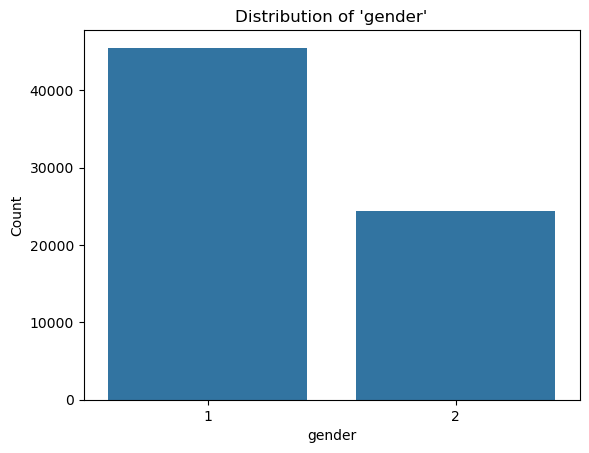

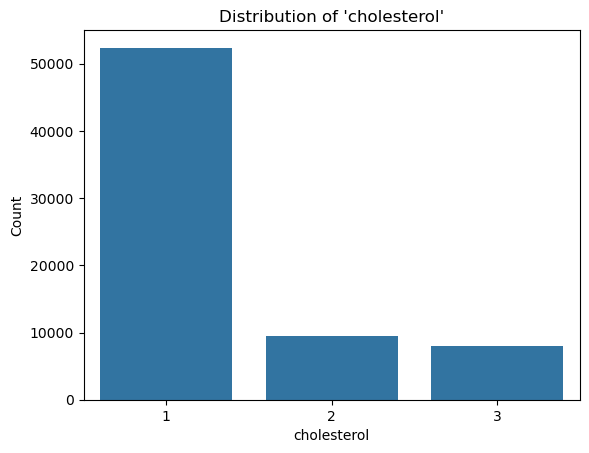

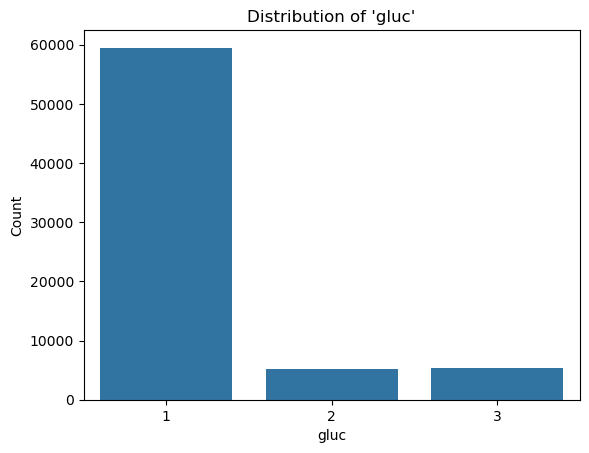

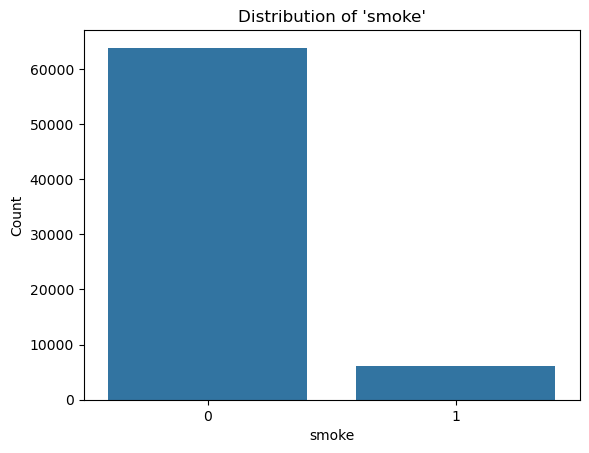

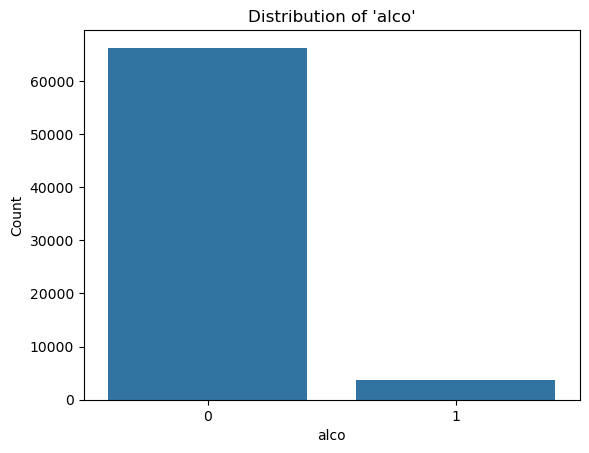

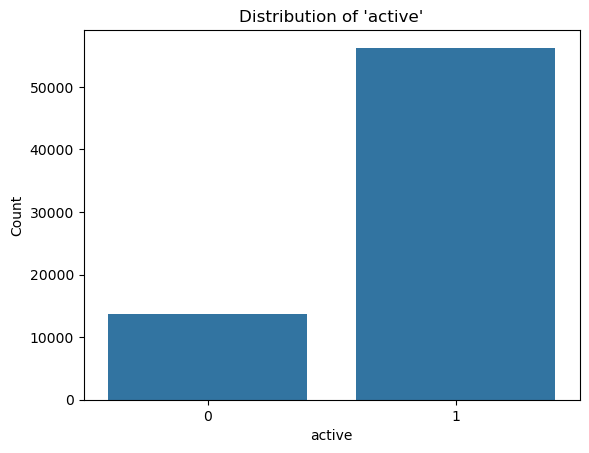

In [16]:
# Plot count distribution for each categorical column
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of '{col}'")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

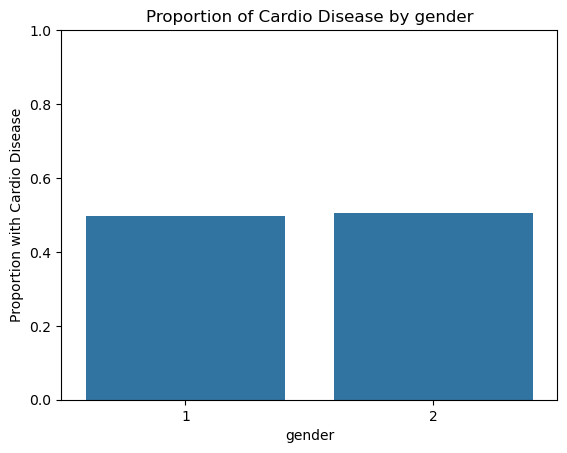

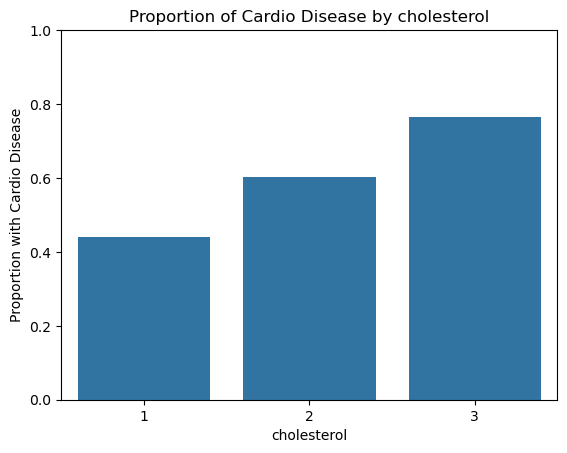

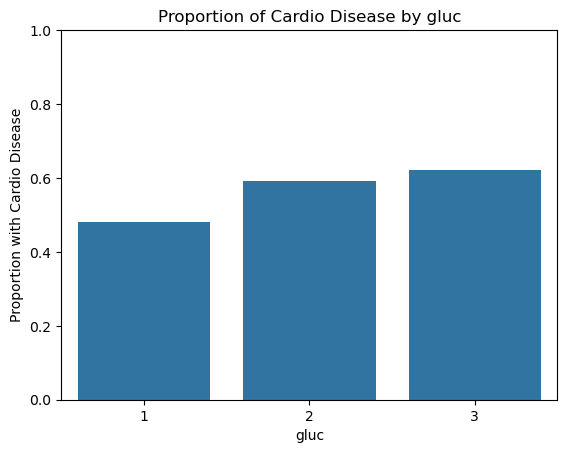

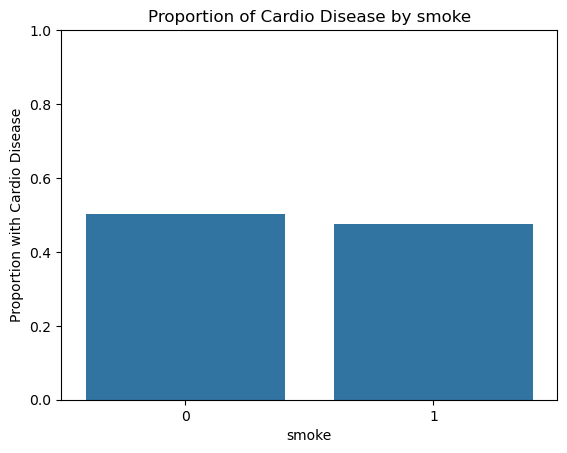

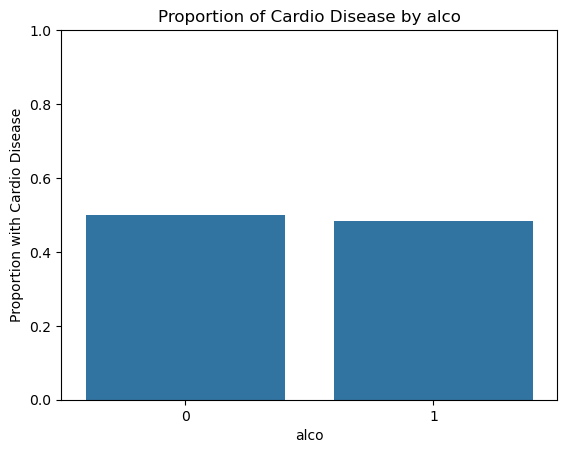

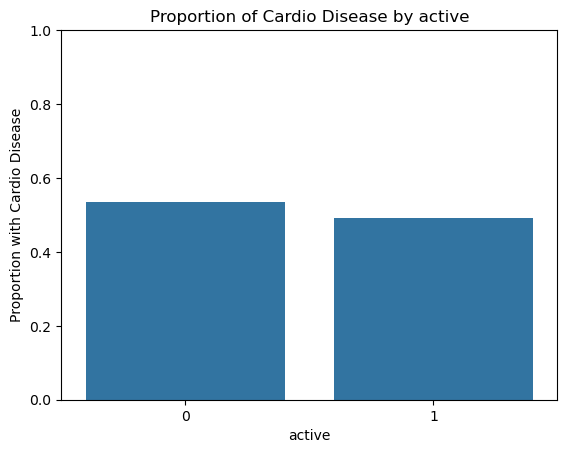

In [17]:
# List of categorical columns to analyze
cat_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Loop through each column to plot its relationship with cardio
for col in cat_cols:
    # Create a barplot to show the percentage of cardio = 1 within each category
    prop_df = df.groupby(col)['cardio'].mean().reset_index()

    sns.barplot(x=col, y='cardio', data=prop_df)
    plt.title(f"Proportion of Cardio Disease by {col}")
    plt.ylabel("Proportion with Cardio Disease")
    plt.xlabel(col)
    plt.ylim(0, 1)  # Proportions range from 0 to 1
    plt.show()

In [18]:
df.describe()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,1.349571,164.439186,74.154512,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,52.840671
std,28851.302323,0.476838,7.852136,14.098286,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.766774
min,0.000000,1.000000,130.000000,40.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,25006.750000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74889.250000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,2.000000,200.000000,150.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [19]:

# Total number of rows before cleaning
total_rows = df.shape[0]

# Rows with invalid systolic pressure
invalid_ap_hi = df[(df['ap_hi'] < 90) | (df['ap_hi'] > 250)]

# Rows with invalid diastolic pressure
invalid_ap_lo = df[(df['ap_lo'] < 60) | (df['ap_lo'] > 200)]

# Rows where diastolic is greater than systolic
diastolic_higher = df[df['ap_lo'] > df['ap_hi']]

# Combine all invalid rows (to check overlap)
combined_invalid = pd.concat([invalid_ap_hi, invalid_ap_lo, diastolic_higher]).drop_duplicates()

# Number of invalid rows
invalid_count = combined_invalid.shape[0]

# Percentage of data that will be removed
invalid_percent = (invalid_count / total_rows) * 100

# Print summary
print(f"Total rows: {total_rows}")
print(f"Invalid rows to remove: {invalid_count}")
print(f"Percentage to be removed: {invalid_percent:.2f}%")

Total rows: 70000
Invalid rows to remove: 1501
Percentage to be removed: 2.14%


In [20]:
# Check ranges before cleaning
print("ap_hi range:", df['ap_hi'].min(), "-", df['ap_hi'].max())
print("ap_lo range:", df['ap_lo'].min(), "-", df['ap_lo'].max())

ap_hi range: -150 - 16020
ap_lo range: -70 - 11000


In [21]:
# Filter out unrealistic systolic blood pressure (ap_hi)
# Keep values between 90 and 250 mmHg
df = df[(df['ap_hi'] >= 90) & (df['ap_hi'] <= 250)]

# Filter out unrealistic diastolic blood pressure (ap_lo)
# Keep values between 60 and 200 mmHg
df = df[(df['ap_lo'] >= 60) & (df['ap_lo'] <= 200)]

# Remove rows where diastolic pressure is greater than systolic pressure
# This is medically incorrect (e.g., ap_lo should always be less than ap_hi)
df = df[df['ap_lo'] <= df['ap_hi']]

In [22]:
# Check ranges after cleaning
print("ap_hi range:", df['ap_hi'].min(), "-", df['ap_hi'].max())
print("ap_lo range:", df['ap_lo'].min(), "-", df['ap_lo'].max())

ap_hi range: 90 - 240
ap_lo range: 60 - 182


In [23]:
df.describe()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,68499.000000,68499.000000,68499.000000,68499.000000,68499.000000,68499.000000,68499.000000,68499.000000,68499.000000,68499.000000,68499.000000,68499.000000,68499.000000
mean,49975.974730,1.348939,164.446780,74.092998,126.743033,81.376575,1.364764,1.225857,0.087899,0.053344,0.803472,0.495204,52.833720
std,28845.605874,0.476638,7.838032,14.037560,16.611981,9.362540,0.679103,0.571838,0.283150,0.224720,0.397376,0.499981,6.767274
min,0.000000,1.000000,130.000000,40.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,25006.500000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50010.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,74873.500000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,2.000000,198.000000,150.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68499 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68499 non-null  int64  
 1   gender       68499 non-null  int64  
 2   height       68499 non-null  int64  
 3   weight       68499 non-null  float64
 4   ap_hi        68499 non-null  int64  
 5   ap_lo        68499 non-null  int64  
 6   cholesterol  68499 non-null  int64  
 7   gluc         68499 non-null  int64  
 8   smoke        68499 non-null  int64  
 9   alco         68499 non-null  int64  
 10  active       68499 non-null  int64  
 11  cardio       68499 non-null  int64  
 12  age_years    68499 non-null  int32  
dtypes: float64(1), int32(1), int64(11)
memory usage: 7.1 MB


In [25]:
# Create BMI (Body Mass Index)
# Formula: BMI = weight (kg) / (height (m))^2
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

# Create Age Group as categorical variable
# create 3 age groups:
# 0 = less than 50 years
# 1 = between 50 and 59 years
# 2 = 60 years and above
df['age_group'] = pd.cut(
    df['age_years'],
    bins=[0, 49, 59, 100],
    labels=[0, 1, 2]
).astype(int)

In [26]:
print(df[['bmi', 'age_years', 'age_group']].head())

         bmi  age_years  age_group
0  21.967120         50          1
1  34.927679         55          1
2  23.507805         51          1
3  28.710479         48          0
4  23.011177         47          0


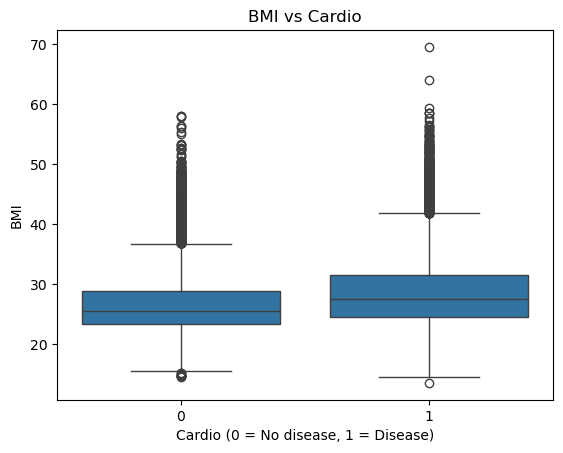

In [27]:
# Boxplot to show BMI distribution by cardio status
sns.boxplot(x='cardio', y='bmi', data=df)
plt.title("BMI vs Cardio")
plt.xlabel("Cardio (0 = No disease, 1 = Disease)")
plt.ylabel("BMI")
plt.show()

In [29]:
# Pulse Pressure = ap_hi - ap_lo
# This feature indicates the difference between ap_hi and ap_lo, useful for heart risk analysis
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo'] 

# Is Obese (1 if BMI >= 30, else 0)
# This binary feature flags individuals considered clinically obese
df['is_obese'] = (df['bmi'] >= 30).astype(int)

# Simple Risk Score (based on BMI, cholesterol, and glucose)
# This feature combines three risk indicators into one simple score (range 0–3)
df['risk_score'] = (
    (df['bmi'] > 30).astype(int) +
    (df['cholesterol'] > 1).astype(int) +
    (df['gluc'] > 1).astype(int)
)

In [30]:
df[['pulse_pressure', 'is_obese', 'risk_score']].head()

,pulse_pressure,is_obese,risk_score
0,30,0,0
1,50,1,2
2,60,0,1
3,50,0,0
4,40,0,0


In [31]:
# Check mean values of new features by cardio status
df.groupby('cardio')[['pulse_pressure', 'is_obese', 'risk_score']].mean()

,pulse_pressure,is_obese,risk_score
cardio,,,
0,41.496443,0.193823,0.473278
1,49.311429,0.329236,0.851714


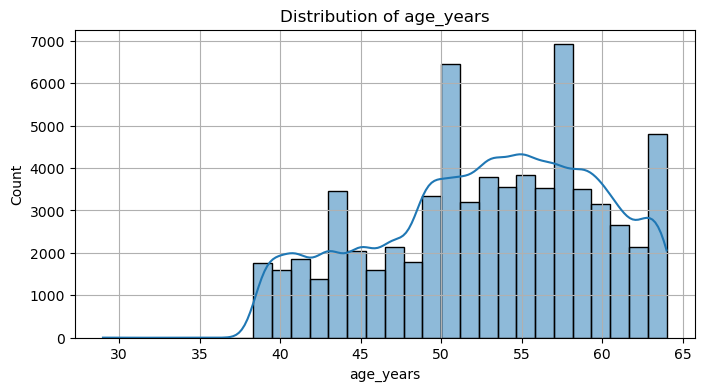

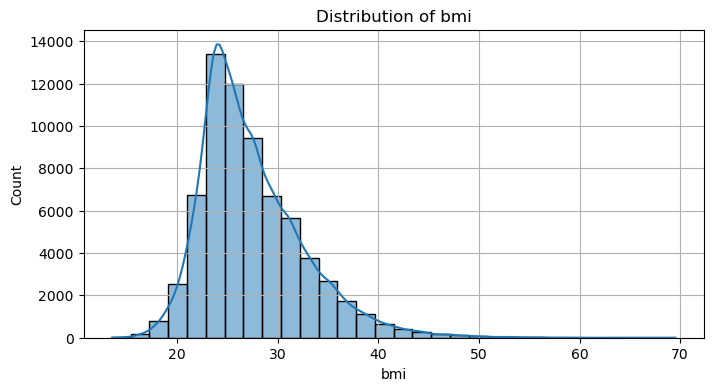

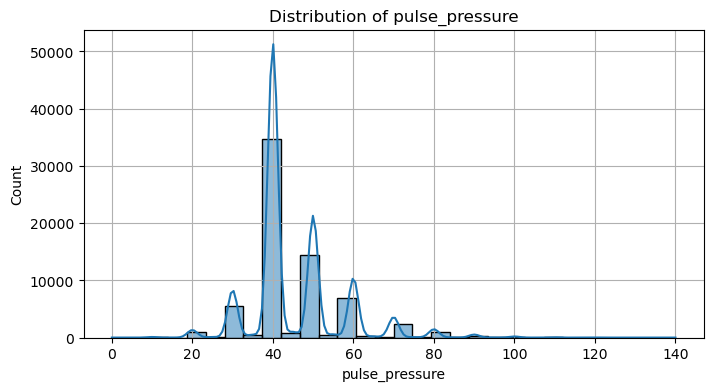

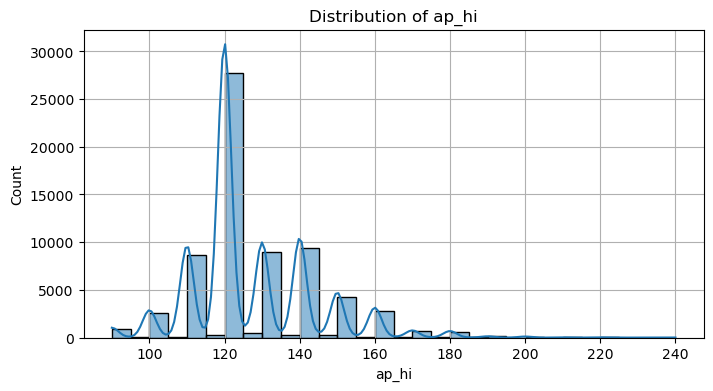

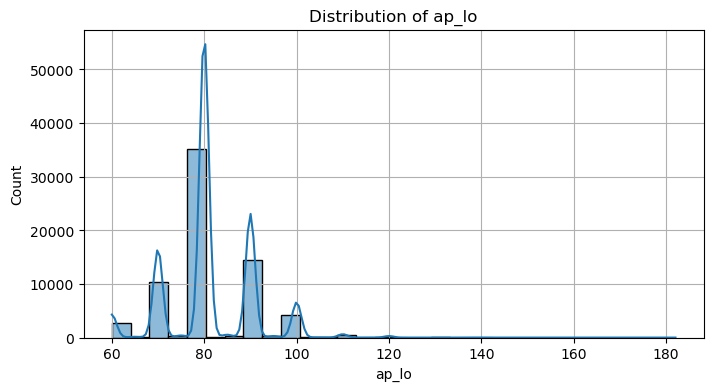

In [32]:
# List of numeric features to analyze
num_cols = ['age_years', 'bmi', 'pulse_pressure', 'ap_hi', 'ap_lo']

# Loop over each feature
for col in num_cols:
    plt.figure(figsize=(8, 4))
    
    # Plot histogram with KDE (density curve)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()

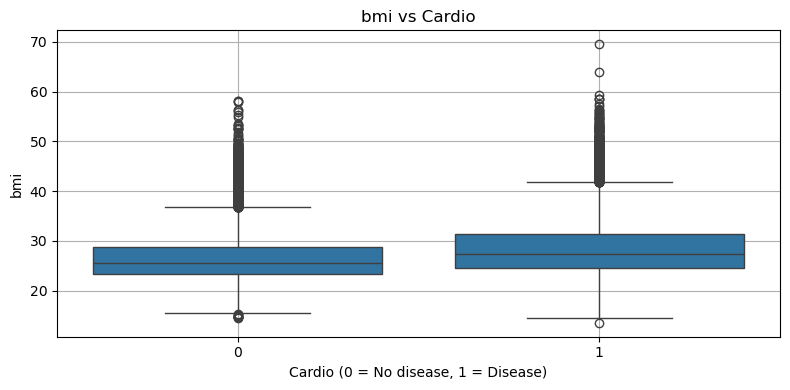

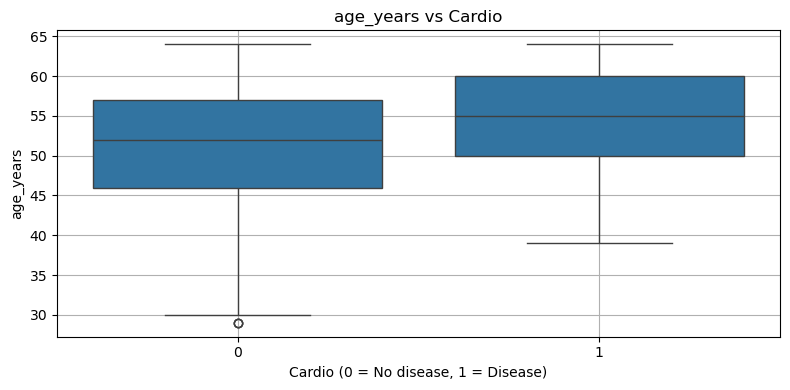

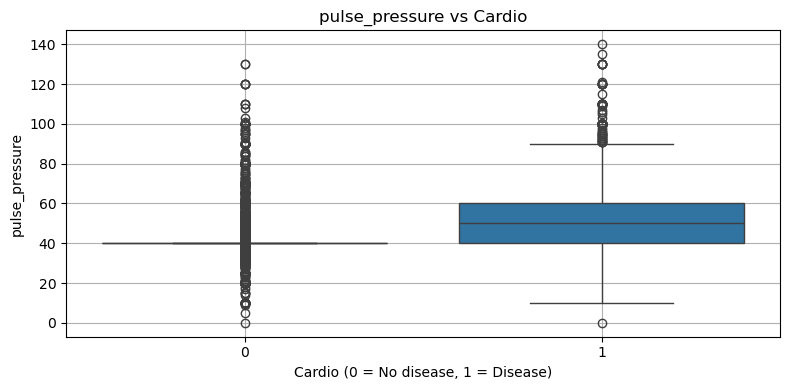

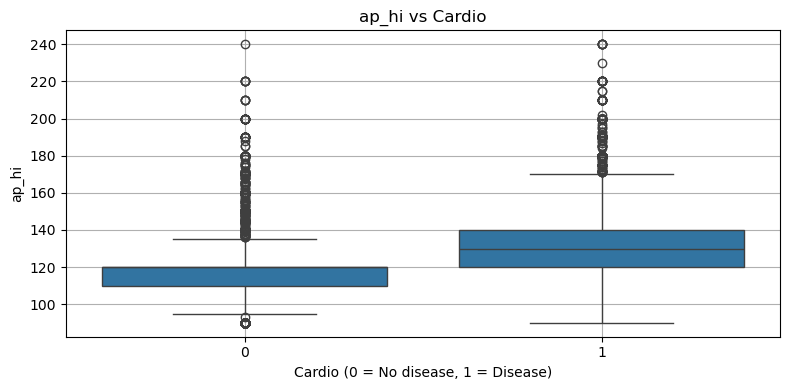

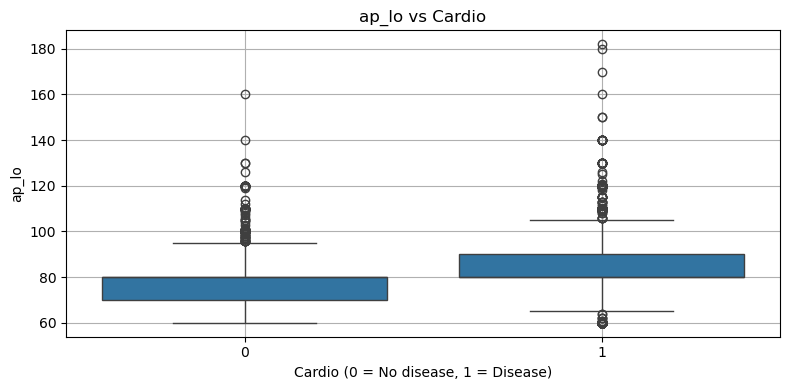

In [33]:
# List of numeric features to compare with cardio
num_cols = ['bmi', 'age_years', 'pulse_pressure', 'ap_hi', 'ap_lo']

# Loop to plot each feature against cardio using Boxplot
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='cardio', y=col, data=df)
    plt.title(f"{col} vs Cardio")
    plt.xlabel("Cardio (0 = No disease, 1 = Disease)")
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

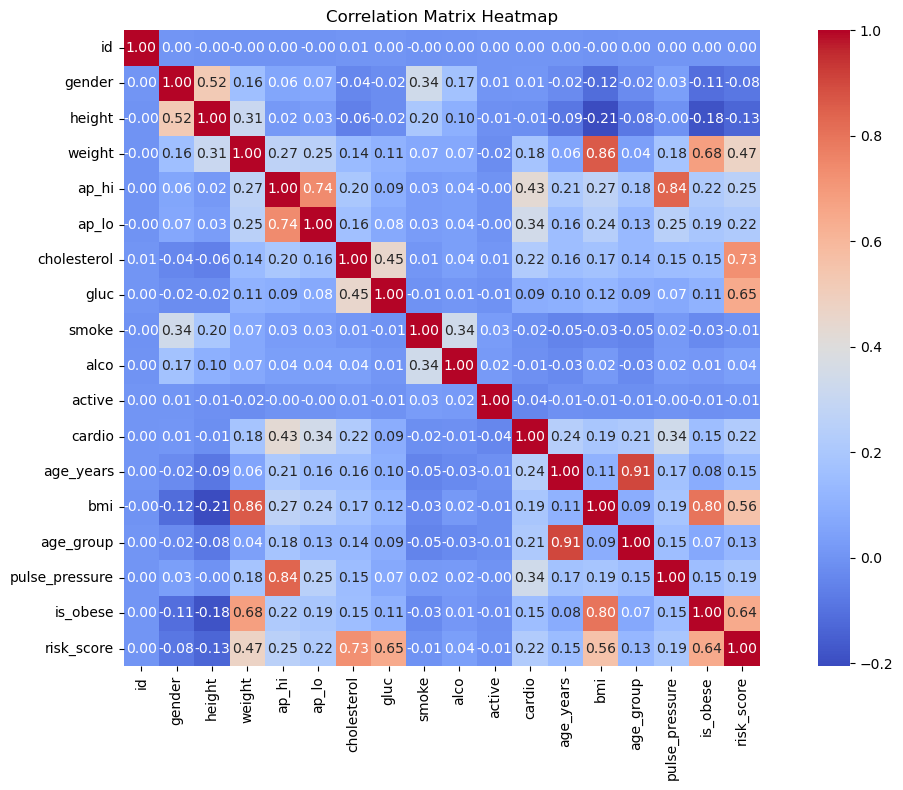

In [34]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

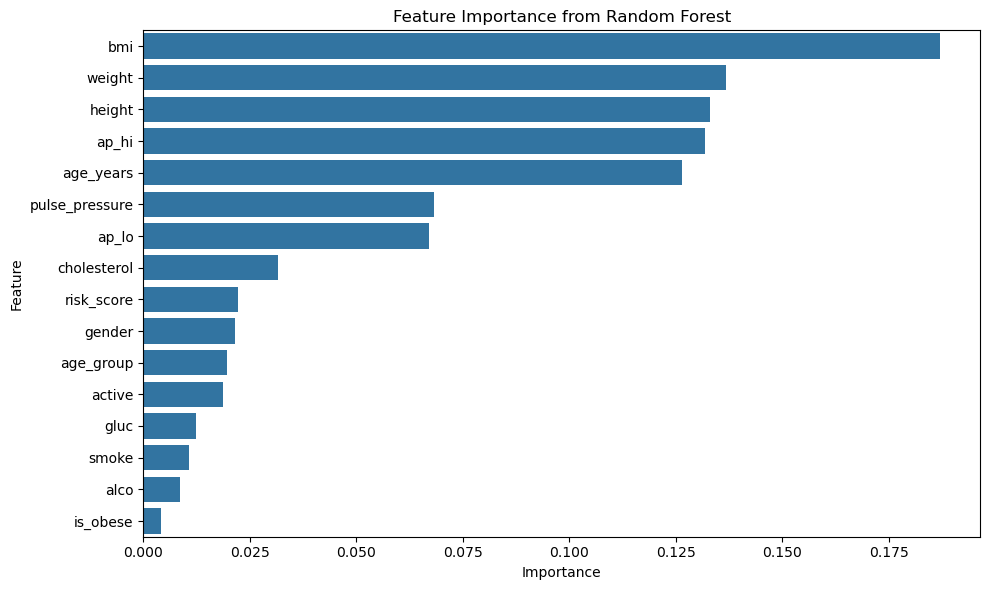

In [35]:
# Define features and target
X = df.drop(columns=['cardio', 'id'])  # Remove the target and the id column
y = df['cardio']

# Train a simple Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Extract feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame to display and sort
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()

In [36]:
# Define the full version of features (all columns except target and ID)
X_full = df.drop(columns=['cardio', 'id'])
y = df['cardio']  # Target column

# Define the selected top features based on feature importance
X_selected = df[['bmi', 'ap_hi', 'age_years', 'pulse_pressure', 'ap_lo', 'cholesterol']]

# Split the full feature dataset into train and test sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y, test_size=0.2, random_state=42)

# Split the selected feature dataset into train and test sets
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

# Train a Random Forest model on the full feature set
model_full = RandomForestClassifier(random_state=42)
model_full.fit(X_train_full, y_train_full)
y_pred_full = model_full.predict(X_test_full)

# Train a Random Forest model on the selected feature set
model_sel = RandomForestClassifier(random_state=42)
model_sel.fit(X_train_sel, y_train_sel)
y_pred_sel = model_sel.predict(X_test_sel)

# Define a function to evaluate model performance
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

# Evaluate both models
results = {
    "Full Features": evaluate_model(y_test_full, y_pred_full),
    "Selected Features": evaluate_model(y_test_sel, y_pred_sel)
}

# Display results
results

{'Full Features': {'Accuracy': 0.7069343065693431,
  'Precision': 0.7023863124718596,
  'Recall': 0.6972586412395709,
  'F1 Score': 0.6998130841121495},
 'Selected Features': {'Accuracy': 0.6652554744525547,
  'Precision': 0.6568309235762761,
  'Recall': 0.6632896305125149,
  'F1 Score': 0.6600444773906597}}

In [38]:
# Define selected features (make sure the columns exist in your DataFrame)
X_selected = df[['bmi', 'ap_hi', 'age_years', 'pulse_pressure', 'ap_lo', 'cholesterol']]
y = df['cardio']

# Split the data into train and test sets
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Create a pipeline with StandardScaler and Logistic Regression
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),  # Normalize features
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))  # Logistic Regression model
])

# Train the model
pipeline_logreg.fit(X_train_sel, y_train_sel)

# Make predictions on the test set
y_pred_logreg = pipeline_logreg.predict(X_test_sel)

# Evaluate model performance
logreg_results = {
    "Accuracy": accuracy_score(y_test_sel, y_pred_logreg),
    "Precision": precision_score(y_test_sel, y_pred_logreg),
    "Recall": recall_score(y_test_sel, y_pred_logreg),
    "F1 Score": f1_score(y_test_sel, y_pred_logreg)
}

# Display the evaluation metrics
logreg_results

{'Accuracy': 0.7264233576642336,
 'Precision': 0.749747219413549,
 'Recall': 0.6628426698450537,
 'F1 Score': 0.7036216985608097}

In [39]:
# Define the full feature set (drop target and ID columns)
X_full = df.drop(columns=['cardio', 'id'])
y_full = df['cardio']

# Split data into train and test sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)

# Create a pipeline with StandardScaler and Logistic Regression
pipeline_logreg_full = Pipeline([
    ('scaler', StandardScaler()),  # Normalize the features
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))  # Create the model
])

# Train the model on the training data
pipeline_logreg_full.fit(X_train_full, y_train_full)

# Predict on the test set
y_pred_logreg_full = pipeline_logreg_full.predict(X_test_full)

# Evaluate the model using classification metrics
logreg_full_results = {
    "Accuracy": accuracy_score(y_test_full, y_pred_logreg_full),
    "Precision": precision_score(y_test_full, y_pred_logreg_full),
    "Recall": recall_score(y_test_full, y_pred_logreg_full),
    "F1 Score": f1_score(y_test_full, y_pred_logreg_full)
}

# Display the results
logreg_full_results

{'Accuracy': 0.7282481751824817,
 'Precision': 0.7492910758965805,
 'Recall': 0.6692491060786651,
 'F1 Score': 0.7070118832139766}

In [41]:
# Define the full feature set
# Exclude the target column 'cardio' and ID
X_full = df.drop(columns=['cardio', 'id'])
y = df['cardio']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y, test_size=0.2, random_state=42
)

# Create a pipeline that includes:
# - StandardScaler: for normalizing the features
# - KNeighborsClassifier: the KNN model
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),                  # Normalize features
    ('knn', KNeighborsClassifier(n_neighbors=5))   
])

# Train the pipeline on the training data
pipeline_knn.fit(X_train_full, y_train_full)

# Predict on the test set
y_pred_knn = pipeline_knn.predict(X_test_full)

# Evaluate the model's performance
knn_results = {
    "Accuracy": accuracy_score(y_test_full, y_pred_knn),
    "Precision": precision_score(y_test_full, y_pred_knn),
    "Recall": recall_score(y_test_full, y_pred_knn),
    "F1 Score": f1_score(y_test_full, y_pred_knn)
}

# Display the evaluation results
knn_results

{'Accuracy': 0.6937226277372263,
 'Precision': 0.686924219910847,
 'Recall': 0.6887663885578069,
 'F1 Score': 0.6878440708227942}

In [42]:
# Define full features and target
# Exclude 'cardio' (target) and 'id' (irrelevant)
X_full = df.drop(columns=['cardio', 'id'])
y = df['cardio']

# Split data into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y, test_size=0.2, random_state=42
)

# Create a pipeline with StandardScaler and XGBoost
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),  # Normalize features
    ('xgb', XGBClassifier(
        random_state=42,
        use_label_encoder=False,  # Required to suppress warning
        eval_metric='logloss'     # Set evaluation metric
    ))
])

# Train the model on the training set
pipeline_xgb.fit(X_train_full, y_train_full)

# Make predictions on the test set
y_pred_xgb = pipeline_xgb.predict(X_test_full)

# Evaluate the model performance
xgb_results = {
    "Accuracy": accuracy_score(y_test_full, y_pred_xgb),
    "Precision": precision_score(y_test_full, y_pred_xgb),
    "Recall": recall_score(y_test_full, y_pred_xgb),
    "F1 Score": f1_score(y_test_full, y_pred_xgb)
}

# Display the results
xgb_results

c:\Users\Elmasrypc\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:54:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'Accuracy': 0.7301459854014598,
 'Precision': 0.7406225059856345,
 'Recall': 0.6912991656734208,
 'F1 Score': 0.7151113508515066}

In [43]:
# Define features and target
X_full = df.drop(columns=['cardio', 'id'])
y_full = df['cardio']

# Split the data
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)

# Create pipeline with scaler + XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

# Define parameter grid to search
param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit grid search to training data
grid_search.fit(X_train_full, y_train_full)

# Get the best model and its results
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_full)

# Evaluate final model
results = {
    "Best Params": grid_search.best_params_,
    "Accuracy": accuracy_score(y_test_full, y_pred_best),
    "Precision": precision_score(y_test_full, y_pred_best),
    "Recall": recall_score(y_test_full, y_pred_best),
    "F1 Score": f1_score(y_test_full, y_pred_best)
}

# Show the results
results

Fitting 3 folds for each of 18 candidates, totalling 54 fits


c:\Users\Elmasrypc\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:38:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'Best Params': {'xgb__learning_rate': 0.2,
  'xgb__max_depth': 3,
  'xgb__n_estimators': 200},
 'Accuracy': 0.7308029197080292,
 'Precision': 0.7415335463258786,
 'Recall': 0.6915971394517283,
 'F1 Score': 0.7156953438174529}

In [44]:
import pickle

# Save the best model to a .pkl file
with open('xgboost_heart_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [45]:
# Save the cleaned and engineered dataset
df.to_csv('cleaned_heart_data.csv', index=False)